In [1]:
import os
import numpy as np
import random

from tqdm.notebook import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

from train import *
from model import *
from utils import *
from config import *

# %matplotlib inline

In [2]:
def save_predicted_maps(model, model_name, dataloader_test, device, save_dir="maps", trs=0.0, dpi=150):
    save_path = os.path.join(save_dir, model_name)                    
    os.makedirs(save_path, exist_ok=True)

    target, prediction = get_target_pred(
        model, device=device,
        dataloader_test=dataloader_test,
    )

    prediction = prediction.detach().cpu().numpy()
    target = target.detach().cpu().numpy()

    for i in tqdm(range(len(prediction)), desc=f"saving predicts of {model_name}"):
        plt_path = os.path.join(save_path, f"map_{i}.png")
        plot_target_pred(target[i], prediction[i], trs=trs, save=True, savepath=plt_path, dpi=dpi)

In [3]:
seed = 10

np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)

In [4]:
print(f"PyTorch version: {torch.__version__}")
print(f"GPU available: {torch.cuda.is_available()}")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
print(f"device: {device}")

PyTorch version: 1.3.1
GPU available: True
device: cuda:0


### with aftershocks, magnitude > 3.5
input: max magnitude map

Done : 30000 / 30080


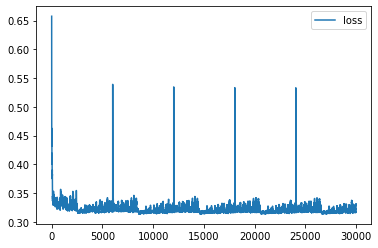


validating . . .


  0%|          | 0/950 [00:00<?, ?it/s]

ROC_AUC = 0.9133380873199708


  0%|          | 0/251 [00:00<?, ?it/s]

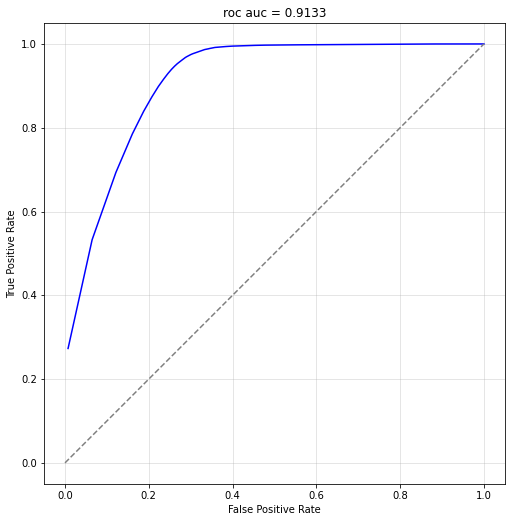

In [7]:
orig_magn_3_5_pipe = pipeline(**orig_magn_3_5_params)
orig_magn_3_5_pipe()

In [8]:
save_predicted_maps(
    model=orig_magn_3_5_pipe.model, model_name=orig_magn_3_5_pipe.model_name, 
    dataloader_test=orig_magn_3_5_pipe.dataloader_test, 
    device=device, save_dir="maps", trs=0.0, dpi=150
)

  0%|          | 0/950 [00:00<?, ?it/s]

/data/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


saving predicts of model_maxmagn_Xorig_Yorig_magn3_5:   0%|          | 0/940 [00:00<?, ?it/s]

### with aftershocks, magnitude > 6
input: max magnitude map

Done : 30000 / 30080


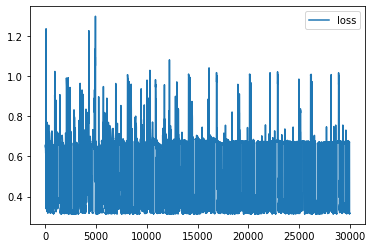


validating . . .


  0%|          | 0/950 [00:00<?, ?it/s]

ROC_AUC = 0.8508481722549934


  0%|          | 0/251 [00:00<?, ?it/s]

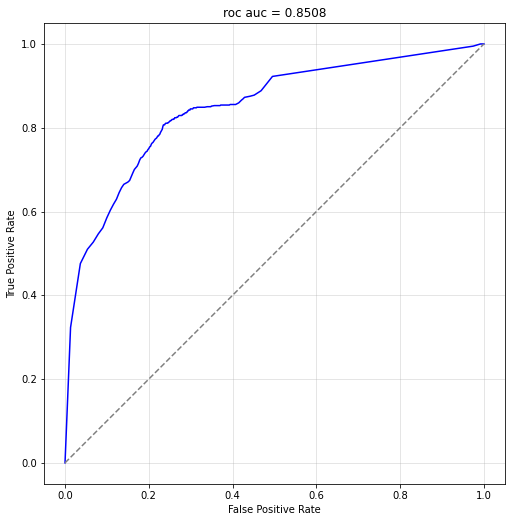

In [9]:
orig_magn_6_pipe = pipeline(**orig_magn_6_params)
orig_magn_6_pipe()

In [10]:
save_predicted_maps(
    model=orig_magn_6_pipe.model, model_name=orig_magn_6_pipe.model_name, 
    dataloader_test=orig_magn_6_pipe.dataloader_test, 
    device=device, save_dir="maps", trs=0.0, dpi=150
)

  0%|          | 0/950 [00:00<?, ?it/s]

/data/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


saving predicts of model_maxmagn_Xorig_Yorig_magn6:   0%|          | 0/940 [00:00<?, ?it/s]

### without aftershocks, magnitude > 3.5
input: original map

Done : 30000 / 30080


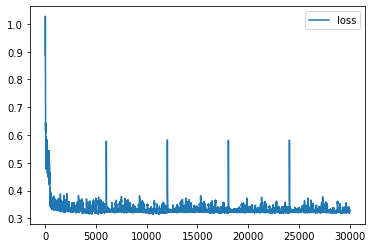


validating . . .


  0%|          | 0/950 [00:00<?, ?it/s]

ROC_AUC = 0.8428823967291398


  0%|          | 0/251 [00:00<?, ?it/s]

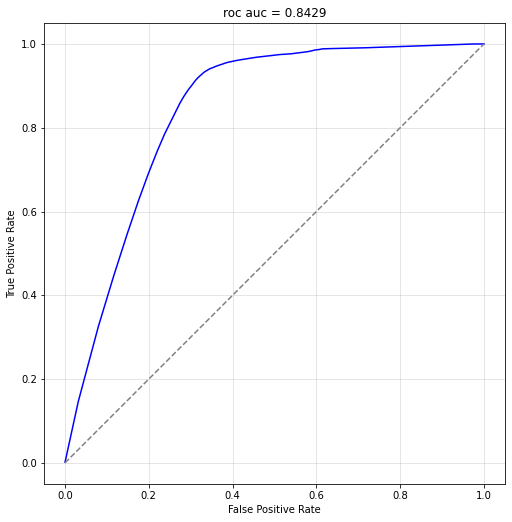

In [11]:
without_aft_magn_3_5_pipe = pipeline(**without_aft_magn_3_5_params)
without_aft_magn_3_5_pipe()

In [12]:
save_predicted_maps(
    model=without_aft_magn_3_5_pipe.model, model_name=without_aft_magn_3_5_pipe.model_name, 
    dataloader_test=without_aft_magn_3_5_pipe.dataloader_test, 
    device=device, save_dir="maps", trs=0.0, dpi=150
)

  0%|          | 0/950 [00:00<?, ?it/s]

/data/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


saving predicts of model_src_Xwithoutaft_Ywithoutaft_magn3_5:   0%|          | 0/940 [00:00<?, ?it/s]

### without aftershocks, magnitude > 6
input: density map + max magnitude map

Done : 30000 / 30080


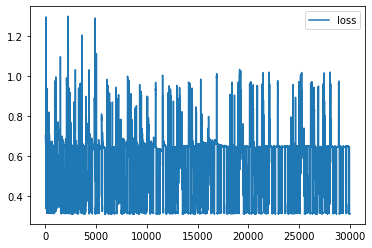


validating . . .


  0%|          | 0/950 [00:00<?, ?it/s]

ROC_AUC = 0.7943978806857217


  0%|          | 0/251 [00:00<?, ?it/s]

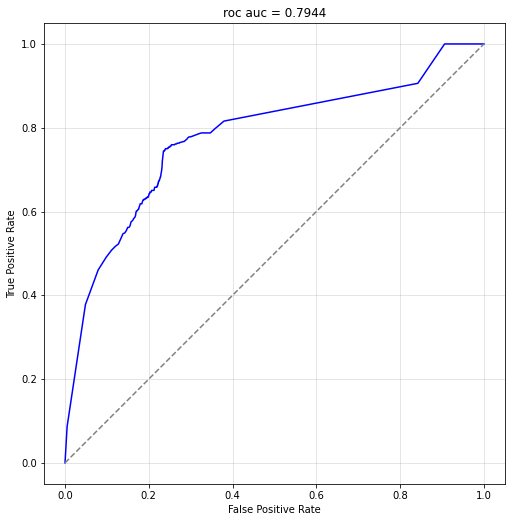

In [5]:
without_aft_magn_6_pipe = pipeline(**without_aft_magn_6_params)
without_aft_magn_6_pipe()

In [6]:
save_predicted_maps(
    model=without_aft_magn_6_pipe.model, model_name=without_aft_magn_6_pipe.model_name, 
    dataloader_test=without_aft_magn_6_pipe.dataloader_test, 
    device=device, save_dir="maps", trs=0.0, dpi=150
)

  0%|          | 0/950 [00:00<?, ?it/s]

/data/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


saving predicts of model_maxmagn_density_Xorig_Ywithoutaft_magn6:   0%|          | 0/940 [00:00<?, ?it/s]